In [1]:
import matplotlib
matplotlib.use('agg')

In [2]:
try:
    get_ipython().magic('matplotlib inline')
except NameError:
    pass

In [3]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()) + '/Code/11_band_TB/')

import kwant
import numpy as np
from types import SimpleNamespace

from kwant._colormaps import kwant_red

In [4]:
import Modules.plot_functions as pf
import Modules.TB_parameters as Tpar
import Modules.functions as func

In [5]:
import matplotlib.pyplot as plt
from matplotlib import ticker, gridspec
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.gridspec import GridSpec
import pickle

In [6]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('axes', linewidth=1.5)

In [7]:
def swap(pl):
    for dat in pl:
        xdata = dat.get_xdata()
        ydata = dat.get_ydata()
        dat.set_xdata(ydata)
        dat.set_ydata(xdata)
    return pl


def latex(x, pos=None):
    return '${}$'.format(x)


def set_ticks(ax, xticks=(), yticks=(), logx=False, logy=False, xpower=False, ypower=False):
    """Add latex ticks to an Axes instance optionally setting log-scale."""
    if logx:
        ax.set_xscale('log')
        xfmt = '$10^{{{}}}$'
        xvals = [10**i for i in xticks]
    elif xpower:
        xfmt = '$10^{{{}}}$'
        xvals = xticks
    else:
        xfmt = '${}$'
        xvals = xticks

    if logy:
        ax.set_yscale('log')
        yfmt = '$10^{{{}}}$'
        yvals = [10**i for i in yticks]
    elif ypower:
        yfmt = '$10^{{{}}}$'
        yvals = yticks
    else:
        yfmt = '${}$'
        yvals = yticks

    if xticks is not None:
        ax.set_xticks(xvals)
        ax.set_xticklabels([xfmt.format(i) for i in xticks])

    if yticks is not None:
        ax.set_yticks(yvals)
        ax.set_yticklabels([yfmt.format(i) for i in yticks])

In [8]:
def subplot_color(fig, ax, data, xs, ys, xlabel=r'$k_\parallel$', ylabel=r'$E/\Delta$', barlabel='Color',
                  sharexax=False, shareyax=False, cbar_ticks=[], vmin=None, vmax=None, title=None,
                  titleloc=[0.2, 0.8],
                  pcolor=False, cmap=None, xticks=None, yticks=None, transpose=False, norm=1.0, normalizer=False,
                  labels=['$\mathrm{(a)}$'], labellocs=[(0.02, 0.7)], cbar_loc=[0.125, 0.9, 0.6, 0.03],
                  cbar_orientation='horizontal', cb_ticks_loc='bottom', cb_label_pos='bottom', xlim=None,
                  ylim=None, rasterized=False, cbar=True, label_color='k'):
    
    """Make a color subplot. """
    
    dat = np.reshape(data, (len(xs), len(ys)))/norm
    if normalizer:
        normal = pf.MidpointNormalize(midpoint=0, vmin=vmin, vmax=vmax)
    else:
        normal = None
    
    if not pcolor:
        if transpose:
            dat = dat.T
        im = ax.imshow(dat, origin = 'lower', extent=[min(xs), max(xs), min(ys), max(ys)],
                         aspect='auto', cmap=cmap, vmin=vmin, vmax=vmax, norm=normal,
                      rasterized=rasterized)
    else:
        if transpose:
            dat = dat.T
            Xs, Ys = np.meshgrid(ys, xs, indexing='ij')
        else:
            Xs, Ys = np.meshgrid(xs, ys, indexing='ij')
        im = ax.pcolormesh(Xs, Ys, dat, cmap=cmap, vmin=vmin, vmax=vmax, norm=normal,
                           rasterized=rasterized)
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    set_ticks(ax, xticks, yticks)
    ax.tick_params(width=1.5, size=6, labelsize=20)

    if cbar:
#         if side_cbar:
            
        cax = fig.add_axes(cbar_loc)
        cb = fig.colorbar(im, cax=cax, ticks=cbar_ticks, orientation=cbar_orientation)
        cb.ax.xaxis.set_ticks_position(cb_ticks_loc)
        cb.ax.xaxis.set_label_position(cb_label_pos)


#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.1)
#     cb = fig.colorbar(ax.images[0], cax=cax, ticks=cbar_ticks)
#     cb.set_ticklabels([latex(i) for i in cbar_ticks])
    
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.1)
#         cb = fig.colorbar(im, orientation=cbar_orientation, ax=ax, cax=cax, ticks=cbar_ticks)
        cb.set_ticklabels([latex(i) for i in cbar_ticks])
        if barlabel:
            cb.set_label(barlabel,  fontsize=25)
        cax.tick_params(width=1.5, size=6, labelsize=20)
    if sharexax:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        if xlabel:
            ax.set_xlabel(xlabel, fontsize=25)
    if shareyax:
        plt.setp(ax.get_yticklabels(), visible=False)
    else:
        if ylabel:
            ax.set_ylabel(ylabel, fontsize=25)
    for label, labelloc in zip(labels, labellocs):
        ax.text(labelloc[0], labelloc[1], label, transform=ax.transAxes, color=label_color, fontsize=25)
    if title:
        ax.text(titleloc[0], titleloc[1], title, transform=ax.transAxes, fontsize=25)
        
def subplot_line(ax, xs, ys, xticks=None, yticks=None, ylim=None, xlim=None, sharexax=False,
                 title=None, textloc=[0.5, 0.5], labels=['$\mathrm{(a)}$'], labellocs=[(0.02, 0.7)],
                 xlabel=None, flip=False, ylabel=None, shareyax=False):
    
    ax.set_ylabel(ylabel, fontsize=25)
    pl = ax.plot(xs, ys, 'k-')
    if flip:
        pl = swap(pl)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.tick_params(width=1.5, size=6, labelsize=23)
    set_ticks(ax, xticks, yticks)
    if sharexax:
        plt.setp(ax.get_xticklabels(), visible=False)
    else:
        ax.set_xlabel(xlabel, size=25)
    if shareyax:
        plt.setp(ax.get_yticklabels(), visible=False)
    else:
        ax.set_ylabel(ylabel, size=25)
    if title is not None:
        ax.text(textloc[0], textloc[1], title, transform=ax.transAxes, fontsize=20)
    for (label, labelloc) in zip(labels, labellocs):
        ax.text(labelloc[0], labelloc[1], label, transform=ax.transAxes, fontsize=25)


In [9]:
def BZ_edge_cut_sketch(ax):
    
    def get_thetas(theta):
        # plus thetas, minus thetas
        return [theta, theta+2*np.pi/3, theta+4*np.pi/3], [-theta, -theta+2*np.pi/3, -theta+4*np.pi/3]
    
    def coords(theta, r=1., shift=(0, 0)):
        return r*np.cos(theta) + shift[0], r*np.sin(theta) + shift[1]

    def nodal_points(angles, r=1., shift=(0, 0)):
        return zip(*[coords(angle, r=r, shift=shift) for angle in angles])
    
    r = 0.52
    shift = np.array([1.2, 0])

    # Circles where SOI vanishes
    circle = [coords(theta, r=r, shift=shift) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs, cys = zip(*circle)
    ax.plot(cxs, cys, linestyle='dotted', color='grey', lw=2, zorder=1)
    circle = [coords(theta, r=r, shift=-shift) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs, cys = zip(*circle)
    ax.plot(cxs, cys, linestyle='dotted', color='grey', lw=2, zorder=1)

    # Nodal points
    theta = 0.263*np.pi

    point_size = 150
    plus_thetas, minus_thetas = get_thetas(theta)
    pxsR, pysR = nodal_points(plus_thetas, r=r, shift=shift)
    mxsR, mysR = nodal_points(minus_thetas, r=r, shift=shift)
    pxsL, pysL = nodal_points([-theta + np.pi for theta in plus_thetas], r=r, shift=-shift)
    mxsL, mysL = nodal_points([-theta + np.pi for theta in minus_thetas], r=r, shift=-shift)
    ax.scatter(pxsR, pysR, marker=r'P', color='b', s=point_size, zorder=4)
    ax.scatter(mxsR, mysR, marker=r'*', color='r', s=point_size, zorder=4)
    ax.scatter(pxsL, pysL, marker=r'P', color='b', s=point_size, zorder=4)
    ax.scatter(mxsL, mysL, marker=r'*', color='r', s=point_size, zorder=4)

    # BZ armchair unit cell
    def rotate_point(point, angle):
        rot = np.array([[np.cos(angle), -np.sin(angle)],
                        [np.sin(angle), np.cos(angle)]])
        return rot.dot(point)

#     length = 4
#     width = 1.4
#     angle = 0
#     corners = [np.array([-length/2, -width/2]),
#                np.array([length/2, -width/2]),
#                np.array([length/2, width/2]),
#                np.array([-length/2, width/2])]
#     corners = [rotate_point(point, angle) for point in corners]
#     corners.append(corners[0])
#     xs, ys = zip(*corners)
#     ax.plot(xs, ys, color='black', linestyle='dashed')

    # Another cut
    length = 3.8
    width = 1.4
    angle = 5*2*np.pi/360
    corners = [np.array([-length/2, -width/2]),
               np.array([length/2, -width/2]),
               np.array([length/2, width/2]),
               np.array([-length/2, width/2])]
    corners = [rotate_point(point, angle) for point in corners]
    corners.append(corners[0])
    xs, ys = zip(*corners)
    ax.plot(xs, ys, color='black', linestyle='-.', linewidth=2)

    ### Projections of nodal points  ######
    def crossing_point(L1, L2):
        """Intersection point of two lines. L1 and L2 are tuples (slope, x, y), where
        x and y are points on the line. """
        h1, x1, y1 = L1
        h2, x2, y2 = L2
        xc = (h1*x1 - h2*x2 - y1 + y2)/(h1 - h2)
        yc = h1*xc - h1*x1 + y1
        return xc, yc

    # Nodal points by chirality
    p_points = list(zip(pxsR, pysR)) + list(zip(pxsL, pysL))
    m_points = list(zip(mxsR, mysR)) + list(zip(mxsL, mysL))
    # Edge of BZ line
    edge_line = (np.tan(angle + np.pi/2), *corners[0])

    p_crossings = [crossing_point((np.tan(angle), *p_point), edge_line) for p_point in p_points]
    for (x1, y1), (x2, y2) in zip(p_crossings, p_points):
        ax.plot([x1, x2], [y1, y2], color='blue', linestyle='dashed', zorder=2)
    m_crossings = [crossing_point((np.tan(angle), *m_point), edge_line) for m_point in m_points]
    for (x1, y1), (x2, y2) in zip(m_crossings, m_points):
        ax.plot([x1, x2], [y1, y2], color='red', linestyle='dashed', zorder=2)

    # Primitive BZ
    WxBZ = 2*shift[0]
    WyBZ = WxBZ * np.sqrt(3)/2
    BZ_corners = [(WxBZ/2, 0), (WxBZ/4, WyBZ/2), (-WxBZ/4, WyBZ/2),
                  (-WxBZ/2, 0), (-WxBZ/4, -WyBZ/2), (WxBZ/4, -WyBZ/2),
                 (WxBZ/2, 0)]
    corner_xs, corner_ys = zip(*BZ_corners)
    ax.plot(corner_xs, corner_ys, color='black', lw=4)

    # k_x and k_y axes
    ax.arrow(0, -0.6*WyBZ, 0.0, 1.15*WyBZ, head_width=0.075, head_length=0.1,
             linewidth=2, fc='k', ec='k', zorder=1)
    ax.text(0.075, 0.53*WyBZ, r'$k_y$', fontsize=30)
    ax.arrow(corners[0][0], corners[0][1], 2*np.abs(corners[0][0])+0.2, 0.0, linewidth=2,
             head_width=0.075, head_length=0.1,
             fc='k', ec='k', zorder=1)
    ax.text(0.81*WxBZ, -0.51*WyBZ, r'$k_x$', fontsize=30)
    
    # k_par and k_perp axes
    L = width + 0.2
    ax.arrow(corners[0][0], corners[0][1], L*np.cos(angle+np.pi/2), L*np.sin(angle+np.pi/2), linewidth=2,
             head_width=0.075, head_length=0.1, fc='k', ec='k', zorder=1)
    ax.text(-0.79*WxBZ, 0.33*WyBZ, r'$k_\parallel$', fontsize=30)
    L = length + 0.1
    ax.arrow(corners[0][0], corners[0][1], L*np.cos(angle), L*np.sin(angle), linewidth=2,
             head_width=0.075, head_length=0.1, fc='k', ec='k', zorder=1)
    ax.text(0.84*WxBZ, -0.22*WyBZ, r'$k_\perp$', fontsize=30)

    # Gamma, K, -K
    symmetry_points = [(0, 0), (WxBZ/2, 0), (-WxBZ/2, 0)]
    for point in symmetry_points:
        ax.scatter(point[0], point[1], color='k', s=point_size/3, zorder=4)
    ax.text(0.05, -0.11, r'$\Gamma$', fontsize=30)
    ax.text(WxBZ/2+0.05, -0.075, r'$\mathrm{K}$', fontsize=30)
    ax.text(-WxBZ/2-0.25, -0.075, r'-$\mathrm{K}$', fontsize=30, zorder=1)
    
    # Denote angle relative to armchair
    center = corners[0]
    r = 0.85*length
    angles = np.linspace(0, 0.087, 150)
    arc = [np.array(center) + np.array([r*np.cos(angle), r*np.sin(angle)]) for angle in angles]
    xs, ys = zip(*arc)
    plt.plot(xs, ys, color='black', linewidth=1)
    ax.text(0.6*WxBZ, -0.37*WyBZ, r'$\phi$', fontsize=30)

    # Topo regions on kpar axis
    sort_p_by_y = np.argsort(np.array([p_crossing[1] for p_crossing in p_crossings]))
    p_crossings = np.array(p_crossings)[sort_p_by_y]
    sort_m_by_y = np.argsort(np.array([m_crossing[1] for m_crossing in m_crossings]))
    m_crossings = np.array(m_crossings)[sort_m_by_y]
    delta = 0.015
    dx, dy = delta*np.cos(angle + np.pi/2), delta*np.sin(angle + np.pi/2)
    x0, y0 = p_crossings[0]
    x1, y1 = m_crossings[0]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    x0, y0 = p_crossings[1]
    x1, y1 = m_crossings[1]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    x0, y0 = m_crossings[2]
    x1, y1 = m_crossings[3]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    x0, y0 = m_crossings[3]
    x1, y1 = p_crossings[2]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='m', lw=6, zorder=3)
    x0, y0 = p_crossings[2]
    x1, y1 = p_crossings[3]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    x0, y0 = p_crossings[4]
    x1, y1 = m_crossings[4]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    x0, y0 = p_crossings[5]
    x1, y1 = m_crossings[5]
    ax.plot((x0+dx, x1-dx), (y0+dy, y1-dy), color='g', lw=6, zorder=3)
    
    # Winding number
#     ax.text(-0.87*WxBZ, 0.05*WyBZ, r'$1$', fontsize=25)
#     ax.arrow(-0.84*WxBZ, 0.08*WyBZ, 0.075, 0.22, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.arrow(-0.84*WxBZ, 0.07*WyBZ, 0.1, 0.01, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.arrow(-0.84*WxBZ, 0.06*WyBZ, 0.11, -0.18, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.text(-0.86*WxBZ, -0.11*WyBZ, r'$2$', fontsize=25)
#     ax.arrow(-0.83*WxBZ, -0.09*WyBZ, 0.105, 0.01, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.text(-0.85*WxBZ, -0.26*WyBZ, r'$1$', fontsize=25)
#     ax.arrow(-0.82*WxBZ, -0.23*WyBZ, 0.075, 0.2, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.arrow(-0.82*WxBZ, -0.24*WyBZ, 0.1, 0.01, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
#     ax.arrow(-0.82*WxBZ, -0.25*WyBZ, 0.12, -0.2, head_width=0.0, head_length=0.0, fc='k', ec='k', zorder=6)
    
    ax.set_ylim(-0.53*WyBZ, 0.6*WyBZ)
    ax.set_xlim(-0.85*WxBZ, 0.9*WxBZ)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off');

In [10]:
def edge_cut_winding(fig, ax1):
    path = os.path.dirname(os.getcwd()) + '/data/11_band/edges/'
    out_name = 'winding_Exs_kpars_mm14nn27_mu1839eV_adaptive_higher_res'
    with open(path + out_name + '.p', 'rb') as fp:
        data = pickle.load(fp)
        kpars = pickle.load(fp)
        Exs = pickle.load(fp)
        p = pickle.load(fp)
        N = pickle.load(fp)
        eps = pickle.load(fp)
        half_BZ = pickle.load(fp)
        adaptive = pickle.load(fp)
        phase = pickle.load(fp)
    sqrts = np.sqrt(Exs**2 - p.Delta**2)
    
    dat = np.reshape(data, (len(kpars), len(Exs)))
    pdat = np.hstack([dat.T[:, 1:][:, ::-1], dat.T]).T
    
    ys = np.hstack((-kpars[1:][::-1], kpars))
    xs = 1000*sqrts
    Xs, Ys = np.meshgrid(xs, ys, indexing='xy')
    normalizer = pf.MidpointNormalize(midpoint=0)
    im = ax1.pcolormesh(Xs, Ys, pdat, cmap='seismic', norm=normalizer, rasterized=True)
    
    ax1.set_xlim(0, 9)
    yticks = [-0.1, 0, 0.1]
    xticks = [0, 2, 4, 6, 8]
    set_ticks(ax1, xticks, yticks)
    ax1.tick_params(width=1.5, size=6, labelsize=20)
    ax1.set_xlabel(r'$\sqrt{V_x^2 - \Delta^2}~~[\mathrm{meV}]$', fontsize=25)
    ax1.set_ylabel(r'$k_\parallel~~[1/a]$', fontsize=25)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar_ticks = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
    cb = fig.colorbar(im, cax=cax, ticks=cbar_ticks)
    cb.set_ticklabels([latex(i) for i in cbar_ticks])
    cb.set_label(r'$W$',  fontsize=25)
    cax.tick_params(width=1.5, size=6, labelsize=20)

In [11]:
def edge_cuts():
    fig = plt.figure()
#     fig.set_size_inches(13, 13)
    fig.set_size_inches(12, 9)
    gs = gridspec.GridSpec(100, 100)

    fig.text(0.25, 0.83, r'$\mathrm{(a)}$', fontsize=35)
    fig.text(0.19, 0.41, r'$\mathrm{(b)}$', fontsize=35)
    
    # gs = gridspec.GridSpec(3, 3)
    ax1 = plt.subplot(gs[0:60, :])
    BZ_edge_cut_sketch(ax1)

    ax2 = plt.subplot(gs[65:100, 20:85])
    edge_cut_winding(fig, ax2)
    
    name = 'edge_cut_winding.pdf'
    plt.savefig(name, bbox_inches='tight')
    plt.show()    

In [12]:
edge_cuts()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [13]:
def K_cond_dispersions(p, bands=slice(14, 16)):
    fig = plt.figure()
    fig.set_size_inches(10, 8)
    name = 'crossings_11.pdf'
    
    # -K point
    gs1 = GridSpec(3, 2)
    gs1.update(left=0.05, right=0.5, hspace=0.5, wspace=0.05)
    ax1 = plt.subplot(gs1[:2, :])
    mK_kxs = np.linspace(-1.14, -0.86, 2000)*Tpar.Kp[0]
    mKky = -Tpar.Kp[1]
    mK_ks = [(kx, mKky) for kx in mK_kxs]
    mK_disp = func.dispersion(mK_ks, p, bands=bands)
    mK_crossings = mK_disp[[i for i, (E1, E2) in enumerate(mK_disp) if np.abs(E1-E2)<1e-5]]
    ax1.axhline(sum(mK_crossings[0])/2, ls='dotted', c='k')
    ax1.axhline(sum(mK_crossings[1])/2, ls='dotted', c='k')
    mK_cross_diff = np.abs(sum(mK_crossings[0])/2 - sum(mK_crossings[1])/2)
    mK_kxs = mK_kxs/(4*np.pi/3.)
    pf.subplot_disp(ax1, mK_disp, mK_kxs, title=r'$-K$', xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=r'$\mu$ [eV]',
                 xlim=(-1.13, -0.87), ylim=(1.765, 1.88), xticks=None, yticks=None)
    ax2 = plt.subplot(gs1[2:, 0])
    pf.subplot_disp(ax2, mK_disp, mK_kxs, xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=r'$\mu$ [eV]',
                 xlim=(-1.11, -1.08), ylim=(1.820, 1.854), xticks=[-1.10, -1.09], yticks=None)
    ax2.axhline(sum(mK_crossings[0])/2, ls='dotted', c='k')
    ax2.axhline(sum(mK_crossings[1])/2, ls='dotted', c='k')
    
    ax3 = plt.subplot(gs1[2:, 1])
    pf.subplot_disp(ax3, mK_disp, mK_kxs, xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=None,
                 xlim=(-0.92, -0.89), ylim=(1.820, 1.854), xticks=[-0.91, -0.90], yticks=[])
    ax3.axhline(sum(mK_crossings[0])/2, ls='dotted', c='k')
    ax3.axhline(sum(mK_crossings[1])/2, ls='dotted', c='k')
    # K point
    gs2 = GridSpec(3, 2)
    gs2.update(left=0.53, right=0.98, hspace=0.5, wspace=0.05)
    ax4 = plt.subplot(gs2[:2, :])
    K_kxs = np.linspace(0.86, 1.14, 2000)*Tpar.Kp[0]
    Kky = Tpar.Kp[1]
    K_ks = [(kx, Kky) for kx in K_kxs]
    K_disp = func.dispersion(K_ks, p, bands=bands)
    K_crossings = K_disp[[i for i, (E1, E2) in enumerate(K_disp) if np.abs(E1-E2)<1e-5]]
    ax4.axhline(sum(K_crossings[0])/2, ls='dotted', c='k')
    ax4.axhline(sum(K_crossings[1])/2, ls='dotted', c='k')
    K_cross_diff = np.abs(sum(K_crossings[0])/2 - sum(K_crossings[1])/2)
    K_kxs = K_kxs/(4*np.pi/3.)
    pf.subplot_disp(ax4, K_disp, K_kxs, title=r'$K$', xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=None,
                 xlim=(0.87, 1.13), ylim=(1.765, 1.88), xticks=None, yticks=[])
    ax5 = plt.subplot(gs2[2:, 0])
    pf.subplot_disp(ax5, K_disp, K_kxs, xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=None,
                 xlim=(0.89, 0.92), ylim=(1.820, 1.854), xticks=[0.90, 0.91], yticks=[])
    ax5.axhline(sum(mK_crossings[0])/2, ls='dotted', c='k')
    ax5.axhline(sum(mK_crossings[1])/2, ls='dotted', c='k')
    
    ax6 = plt.subplot(gs2[2:, 1])
    pf.subplot_disp(ax6, K_disp, K_kxs, xlabel=r'$k_x$ [$4\pi/3a$]', ylabel=None,
                 xlim=(1.08, 1.11), ylim=(1.820, 1.854), xticks=[1.09, 1.10], yticks=[])
    ax6.axhline(sum(mK_crossings[0])/2, ls='dotted', c='k')
    ax6.axhline(sum(mK_crossings[1])/2, ls='dotted', c='k')
    
    assert np.allclose(K_cross_diff, mK_cross_diff)
    plt.savefig(name)
    plt.show()
    return K_crossings

In [14]:
p = SimpleNamespace(mu=0.0, Delta=0.0, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0)
cross_Es = K_cond_dispersions(p)
mu1, mu2 = cross_Es
mu1 = sum(mu1)/2
mu2 = sum(mu2)/2

In [14]:
def winding_gap_11():  
    # mu1 and mu2 are computed above
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
    name = 'winding_gaps_11.pdf'
    
    # Gap vs ky and Ex at two mus, for both regimes
#     out_name = 'topo_gap_many_mus_pos_kys_Exs_Delta08meV_new_method'
    out_name = 'topo_gap_many_mus_pos_kys_Exs_Delta08meV_new_method_smaller_cell'
    with open(path + out_name + '.p', 'rb') as fp:
        d_dict_g = pickle.load(fp)
        kys_g = pickle.load(fp)
        Exs_g = pickle.load(fp)
        mus_g = pickle.load(fp)
        params_g = pickle.load(fp)
        three_d = pickle.load(fp)
        orb_mag = pickle.load(fp)
        eps = pickle.load(fp)
        start_Es = pickle.load(fp)
        max_iter = pickle.load(fp)
    sqrts_g = np.sqrt(Exs_g**2 - params_g['Delta']**2)
    
    # Winding number vs ky and Ex at two mus, for both regimes
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
#     out_name = 'better_mus_winding_kys_Exs_Delta08meV_adaptive'
    out_name = 'better_mus_winding_pos_kys_Exs_Delta08meV_adaptive'
    with open(path + out_name + '.p', 'rb') as fp:
        d_dict_w = pickle.load(fp)
        kys_w = pickle.load(fp)
        Exs_w = pickle.load(fp)
        mus_w = pickle.load(fp)
        p_w = pickle.load(fp)
        N = pickle.load(fp)
        eps = pickle.load(fp)
        half_BZ = pickle.load(fp)
        adaptive = pickle.load(fp)
        phase = pickle.load(fp)
        extended_hopping = pickle.load(fp)
    sqrts_w = np.sqrt(Exs_w**2 - p_w.Delta**2)
    
    fig = plt.figure()
    fig.set_size_inches(7.5, 6)
    
    xlim = (0, 15)
    ylim = (0, 0.43)
    xticks = [0, 4, 8, 12]
    yticks = [0, 0.2, 0.4]
    data = d_dict_w[1.8337]
#     kys_w/(4*np.pi)*np.sqrt(3.)
    ax1 = fig.add_subplot(2, 2, 1)
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.8, 0.5)]
    data = d_dict_w[1.8337]
    subplot_color(fig, ax1, 2*np.array(data), kys_w, 1000*sqrts_w, sharexax=True,
                  cbar_ticks=[-2, 0, 2], cbar=False, shareyax=False,
                  vmin=-2, vmax=2, ylabel=r'$k_y \ [1/a]$', xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True)
    
    ax2 = fig.add_subplot(2, 2, 2)
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.8, 0.5)]
    data = d_dict_w[1.83]
    subplot_color(fig, ax2, 2*np.array(data), kys_w, 1000*sqrts_w, sharexax=True,
                  cbar_ticks=[-2, 0, 2], shareyax=True,
                  vmin=-2, vmax=2, ylabel=None, xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, barlabel=r'$W$', cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.54, 0.02, 0.33],
                  cbar_orientation='vertical', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)
    # l,b,w,h
#     cbar_loc=[0.125, 0.9, 0.61, 0.03]


    ax3 = fig.add_subplot(2, 2, 3)
    labels = [r'$\mathrm{(c)}$']
    labellocs = [(0.8, 0.5)]
#     kys_g/(2*np.sqrt(3)*4*np.pi)*np.sqrt(3.)
    data = d_dict_g[1.8337]
    subplot_color(fig, ax3, data, kys_g/np.sqrt(3), 1000*sqrts_g, sharexax=False,
                  cbar=False, vmin=0.0, vmax=0.06, ylabel=r'$k_y \ [1/a]$',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  transpose=True, pcolor=True, normalizer=False, cmap='magma', norm=params_g['Delta'],
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True, label_color='w')
    
    ax4 = fig.add_subplot(2, 2, 4)
    labels = [r'$\mathrm{(d)}$']
    labellocs = [(0.8, 0.5)]
    data = d_dict_g[1.83]
    subplot_color(fig, ax4, data, kys_g/np.sqrt(3), 1000*sqrts_g, sharexax=False,
                  shareyax=True, cbar=True, vmin=0.0, vmax=0.06, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  cbar_loc=[0.91, 0.14, 0.02, 0.33], barlabel=r'$E_{\mathrm{gap}}/\Delta$',
                  cbar_ticks=[0, 0.03, 0.06], transpose=True, pcolor=True, normalizer=False, cmap='magma',
                  norm=params_g['Delta'], labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True, cbar_orientation='vertical', label_color='w')
        
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

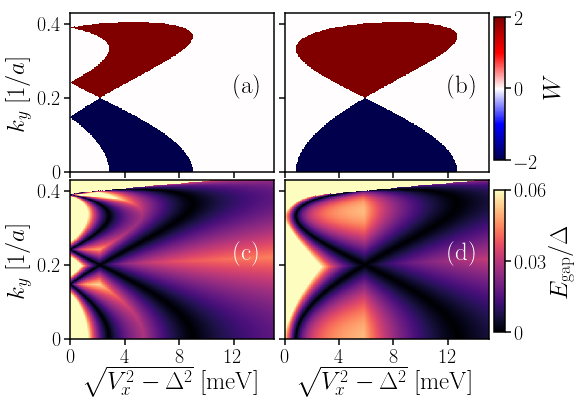

In [15]:
winding_gap_11()

In [73]:
def winding_gap_kp_MoS2():
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
    path = os.path.dirname(os.getcwd()) + r'/data/3_bnd and kp/'
    name = 'topo_kp_MoS2.pdf'
        
    fig = plt.figure()
    fig.set_size_inches(7.5, 6)
    
    xlim = None
    ylim = None
    xticks = [0, 1, 2]
    yticks = [0, 0.1, 0.2]
        
    file = r'winding_kp_mu_1.7065'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))
    
    ax1 = fig.add_subplot(2, 2, 1)
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.8, 0.5)]
    
    subplot_color(fig, ax1, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], cbar=False, shareyax=False,
                  vmin=-2, vmax=2, ylabel=r'$k_y \ [1/a]$', xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True)
    
    file = 'winding_kp_mu_1.706'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))
    
    ax2 = fig.add_subplot(2, 2, 2)
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.8, 0.5)]
    subplot_color(fig, ax2, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], shareyax=True,
                  vmin=-2, vmax=2, ylabel=None, xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, barlabel=r'$W$', cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.54, 0.02, 0.33],
                  cbar_orientation='vertical', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)

    file = 'gap_kp_mu_1.7065'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax3 = fig.add_subplot(2, 2, 3)
    labels = [r'$\mathrm{(c)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax3, Z.T, k2s, vs*1e3, sharexax=False,
                  cbar=False, vmin=0.0, vmax=0.04, ylabel=r'$k_y \ [1/a]$',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  transpose=True, pcolor=True, normalizer=False, cmap='magma', norm=1.,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True, label_color='w')
    
    file = 'gap_kp_mu_1.706'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax4 = fig.add_subplot(2, 2, 4)
    labels = [r'$\mathrm{(d)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax4, Z.T, k2s, vs*1e3, sharexax=False,
                  shareyax=True, cbar=True, vmin=0.0, vmax=0.04, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  cbar_loc=[0.91, 0.14, 0.02, 0.33], barlabel=r'$E_{\mathrm{gap}}/\Delta$',
                  cbar_ticks=[0., 0.01, 0.02, 0.03, 0.04], transpose=True, pcolor=True, normalizer=False, cmap='magma',
                  norm=1., labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True, cbar_orientation='vertical', label_color='w')
        
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

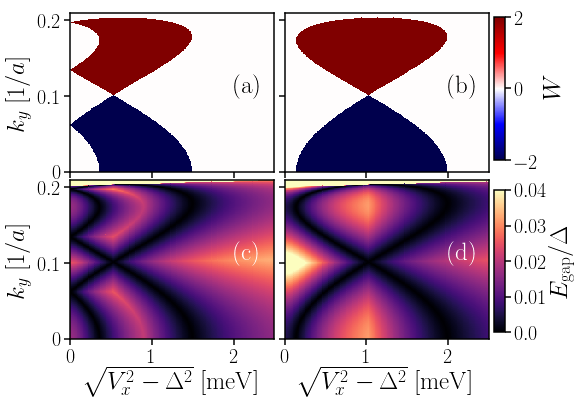

In [74]:
winding_gap_kp_MoS2()

In [29]:
def winding_gap_kp_MoSe2():  
    path = os.path.dirname(os.getcwd()) + r'/data/3_bnd and kp/'
    name = 'topo_kp_MoSe2.pdf'
        
    fig = plt.figure()
    fig.set_size_inches(7.5, 4)
    
    xlim = (0, 20)
    ylim = (0, 0.48)
    xticks = [0, 5, 10, 15]
    yticks = [0, 0.2, 0.4]
        
    file = 'winding_kp_mu_1.578_MoSe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))
    
    ax1 = fig.add_subplot(2, 2, 1)
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.8, 0.5)]
    
    subplot_color(fig, ax1, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], cbar=False, shareyax=False,
                  vmin=-2, vmax=2, ylabel=r'$k_y \ [1/a]$', xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True)
    

    file = 'winding_kp_mu_1.5725_MoSe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax2 = fig.add_subplot(2, 2, 2)
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.8, 0.5)]
    subplot_color(fig, ax2, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], shareyax=True,
                  vmin=-2, vmax=2, ylabel=None, xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, barlabel=r'$W$', cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.54, 0.02, 0.33],
                  cbar_orientation='vertical', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)
    
    vmax = 0.11
    file = 'gap_kp_mu_1.578_MoSe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax3 = fig.add_subplot(2, 2, 3)
    labels = [r'$\mathrm{(c)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax3, Z.T, k2s, vs*1e3, sharexax=False,
                  cbar=False, vmin=0.0, vmax=vmax, ylabel=r'$k_y \ [1/a]$',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  transpose=True, pcolor=True, normalizer=False, cmap='magma', norm=1.,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True, label_color='w')
    
    file = 'gap_kp_mu_1.5725_MoSe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax4 = fig.add_subplot(2, 2, 4)
    labels = [r'$\mathrm{(d)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax4, Z.T, k2s, vs*1e3, sharexax=False,
                  shareyax=True, cbar=True, vmin=0.0, vmax=vmax, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  cbar_loc=[0.91, 0.14, 0.02, 0.33], barlabel=r'$E_{\mathrm{gap}}/\Delta$',
                  cbar_ticks=[0., 0.05, 0.1], transpose=True, pcolor=True, normalizer=False, cmap='magma',
                  norm=1., labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True, cbar_orientation='vertical', label_color='w')
        
    ax1.axvline(4.6, color='green', linestyle='dashed', lw=3)
    ax3.axvline(4.6, color='green', linestyle='dashed', lw=3)
    ax1.text(2, 0.5, r'$\mathrm{I}$', fontsize=25)
    ax1.text(7, 0.5, r'$\mathrm{II}$', fontsize=25)
    
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.savefig(name, bbox_inches='tight', dpi=120)
    plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


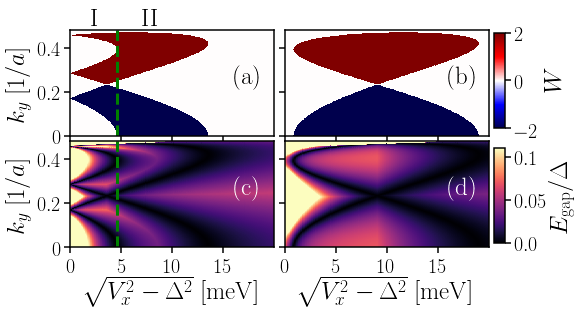

In [30]:
winding_gap_kp_MoSe2()

In [77]:
def winding_gap_kp_MoTe2():  
    path = os.path.dirname(os.getcwd()) + r'/data/3_bnd and kp/'
    name = 'topo_kp_MoTe2.pdf'
        
    fig = plt.figure()
    fig.set_size_inches(7.5, 6)
    
    xlim = (0, 56)
    ylim = (0, 0.6)
    xticks = [0, 25, 50]
    yticks = [0, 0.25, 0.5]
        
    file = 'winding_kp_mu_1.145_MoTe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))
    
    ax1 = fig.add_subplot(2, 2, 1)
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.8, 0.5)]
    
    subplot_color(fig, ax1, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], cbar=False, shareyax=False,
                  vmin=-2, vmax=2, ylabel=r'$k_y \ [1/a]$', xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True)
    
    file = 'winding_kp_mu_1.135_MoTe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax2 = fig.add_subplot(2, 2, 2)
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.8, 0.5)]
    subplot_color(fig, ax2, 2*Z.T, k2s, vs*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], shareyax=True,
                  vmin=-2, vmax=2, ylabel=None, xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, barlabel=r'$W$', cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.54, 0.02, 0.33],
                  cbar_orientation='vertical', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)
    
    vmax = 0.25
    file = 'gap_kp_mu_1.145_MoTe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax3 = fig.add_subplot(2, 2, 3)
    labels = [r'$\mathrm{(c)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax3, Z.T, k2s, vs*1e3, sharexax=False,
                  cbar=False, vmin=0.0, vmax=vmax, ylabel=r'$k_y \ [1/a]$',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  transpose=True, pcolor=True, normalizer=False, cmap='magma', norm=1.,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True, label_color='w')
    
    file = 'gap_kp_mu_1.135_MoTe2'
    Z, k2s, vs, mu, Delta = pickle.load(open(path+file, 'rb'))

    ax4 = fig.add_subplot(2, 2, 4)
    labels = [r'$\mathrm{(d)}$']
    labellocs = [(0.8, 0.5)]

    subplot_color(fig, ax4, Z.T, k2s, vs*1e3, sharexax=False,
                  shareyax=True, cbar=True, vmin=0.0, vmax=vmax, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  cbar_loc=[0.91, 0.14, 0.02, 0.33], barlabel=r'$E_{\mathrm{gap}}/\Delta$',
                  cbar_ticks=[0., 0.1, 0.2, 0.3], transpose=True, pcolor=True, normalizer=False, cmap='magma',
                  norm=1., labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True, cbar_orientation='vertical', label_color='w')
        
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.savefig(name, dpi=240, bbox_inches='tight')
    plt.show()

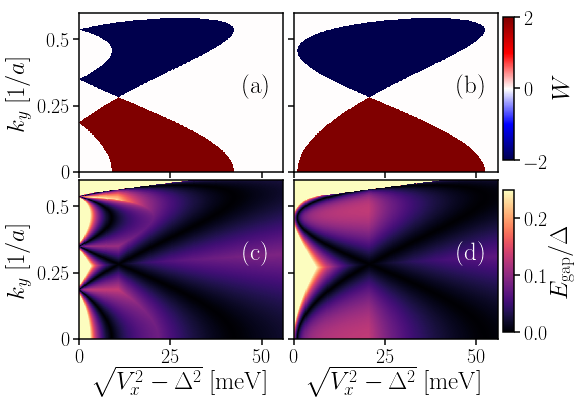

In [78]:
winding_gap_kp_MoTe2()

In [79]:
def winding_gap_3orb():
    path = os.path.dirname(os.getcwd()) + r'/data/3_bnd and kp/'
    name = 'winding_gaps_3.pdf'
        
    fig = plt.figure()
    fig.set_size_inches(7.5, 6)
    
    xlim = (0, 1.5)
    ylim = (0, 0.21)
    xticks = [0, 0.7, 1.4]
    yticks = [0, 0.1, 0.2]
        
    file = 'wind_3bnd_mu_1.708.p' 
    Z, p, betas, mu, sqvd = pickle.load(open(path+file, 'rb'))
    # betas to ky's
    k2s = 2*betas/np.sqrt(3)
    
    ax1 = fig.add_subplot(2, 2, 1)
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.8, 0.5)]
    
    subplot_color(fig, ax1, -Z.T, k2s, sqvd*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], cbar=False, shareyax=False,
                  vmin=-2, vmax=2, ylabel=r'$k_y \ [1/a]$', xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True)
    
    xlim = (0, 1.6)
    file = 'wind_3bnd_mu_1.7075.p'
    Z, p, betas, mu, sqvd = pickle.load(open(path+file, 'rb'))
    # betas to ky's
    k2s = 2*betas/np.sqrt(3)
    
    ax2 = fig.add_subplot(2, 2, 2)
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.8, 0.5)]
    subplot_color(fig, ax2, -Z.T, k2s, sqvd*1e3, sharexax=True,
                  cbar_ticks=[-2, 0, 2], shareyax=True,
                  vmin=-2, vmax=2, ylabel=None, xticks=xticks, yticks=yticks,
                  transpose=True, pcolor=True, normalizer=False, barlabel=r'$W$', cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.54, 0.02, 0.33],
                  cbar_orientation='vertical', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)


    file = 'gap_3orb_mu_1.708.p'
    Z, p, betas, vs, mu = pickle.load(open(path+file, 'rb'))
    k2s = 2*betas/np.sqrt(3)
    
    ax3 = fig.add_subplot(2, 2, 3)
    labels = [r'$\mathrm{(c)}$']
    labellocs = [(0.8, 0.5)]
    xlim = (0, 1.5)
    
    subplot_color(fig, ax3, Z.T, k2s, vs*1e3, sharexax=False,
                  cbar=False, vmin=0.0, vmax=0.04, ylabel=r'$k_y \ [1/a]$',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  transpose=True, pcolor=True, normalizer=False, cmap='magma', norm=1.,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True, label_color='w')
    
    file = 'gap_3orb_mu_1.7075.p'
    Z, p, betas, vs, mu = pickle.load(open(path+file, 'rb'))
    k2s = 2*betas/np.sqrt(3)

    ax4 = fig.add_subplot(2, 2, 4)
    labels = [r'$\mathrm{(d)}$']
    labellocs = [(0.8, 0.5)]
    xlim = (0, 1.6)
    
    subplot_color(fig, ax4, Z.T, k2s, vs*1e3, sharexax=False,
                  shareyax=True, cbar=True, vmin=0.0, vmax=0.04, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=yticks, xlabel=r'$\sqrt{V_x^2-\Delta^2} \ [\mathrm{meV}]$',
                  cbar_loc=[0.91, 0.14, 0.02, 0.33], barlabel=r'$E_{\mathrm{gap}}/\Delta$',
                  cbar_ticks=[0., 0.01, 0.02, 0.03, 0.04], transpose=True, pcolor=True, normalizer=False, cmap='magma',
                  norm=1., labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07],
                  xlim=xlim, ylim=ylim, rasterized=True, cbar_orientation='vertical', label_color='w')
        
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

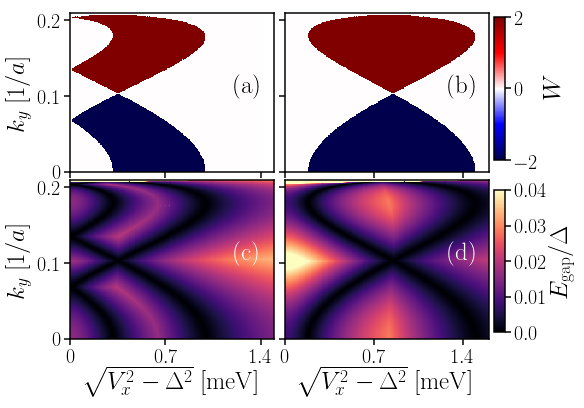

In [80]:
winding_gap_3orb()

In [38]:
def DOS_decay_1():
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
    name = 'DOS_decay_1.pdf'
    # DOS data
#     out_name = 'Edge_DOS_kys_bias_mus_sqrts_no_orb_Delta08meV'
    out_name = 'Edge_DOS_kys_bias_mus_sqrts_no_orb_Delta08meV_smaller_cell'
    with open(path + out_name + '.p', 'rb') as fp:
        DOS_d_dict = pickle.load(fp)
        DOS_kys = pickle.load(fp)
        DOS_Es = pickle.load(fp)
        DOS_sqrts_mus = pickle.load(fp)
        DOS_orb_mag = pickle.load(fp)
        DOS_params = pickle.load(fp)
        DOS_three_d = pickle.load(fp)

    # Decay length data
    out_name = 'decay_length/decay_length_armchair_kpars_sqrt3meV_mu183'
    with open(path + out_name + '.p', 'rb') as fp:
        dl_dat = pickle.load(fp)
        dl_kys = pickle.load(fp)
        dl_params = pickle.load(fp)
        
    # Winding line cut data
    out_name = 'line_cuts/winding_cuts_mu183_sqrts_armchair_kpars_adaptive'
    with open(path + out_name + '.p', 'rb') as fp:
        w_d_dict = pickle.load(fp)
        w_kpars = pickle.load(fp)
        w_p = pickle.load(fp)
        w_N = pickle.load(fp)
        w_eps = pickle.load(fp)
        w_half_BZ = pickle.load(fp)
        w_adaptive = pickle.load(fp)
        w_phase = pickle.load(fp)
        
    fig = plt.figure()
    fig.set_size_inches(7.0, 9)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.7])
    
    xlim = (-0.75/np.sqrt(3), 0.75/np.sqrt(3))
    xticks = [-0.4, -0.2, 0, 0.2, 0.4]
    
#     print(DOS_keys)
#     DOS_data = DOS_d_dict[DOS_keys[1]]
    DOS_data = DOS_d_dict[DOS_sqrts_mus[0]]
    DOS_Es = DOS_Es/DOS_params['Delta']
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.08, 0.88)]
    ax1 = plt.subplot(gs[0, 0])
    subplot_color(fig, ax1, DOS_data, DOS_kys/np.sqrt(3), DOS_Es, sharexax=True, cbar_ticks=[0, 100, 200, 300],
                  vmin=0, vmax=350, ylabel=r'$E/\Delta$', xticks=xticks, yticks=[-0.15, 0.0, 0.15],
                  transpose=False, pcolor=True, normalizer=False, barlabel=None, cmap='magma', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.125, 0.9, 0.55, 0.03],
                  cbar_orientation='horizontal', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'$\rho \ [1/eVa^2]$', titleloc=[0.73, 1.07], xlim=xlim,
                  rasterized=True, label_color='w')
    
    ax2 = plt.subplot(gs[1, 0])
    ys = np.array(dl_dat)*dl_params['a']*1e-4
    labels = [r'$\mathrm{(b)}$', r'$2$', r'$-2$', r'$2$']
    
    def topo_region(y):
        return ((-0.666/np.sqrt(3) <= y <= -0.445/np.sqrt(3)) or
                (0.445/np.sqrt(3) <= y <= 0.666/np.sqrt(3)) or
                (-0.220/np.sqrt(3) <= y <= 0.220/np.sqrt(3)))
    
    ys = [y if topo_region(x) else None for x, y in zip(dl_kys/np.sqrt(3), ys)]
    
    labellocs = [(0.08, 0.88), (0.1, 0.7), (0.45, 0.7), (0.87, 0.7)]
    subplot_line(ax2, dl_kys/np.sqrt(3), ys, xticks=xticks, yticks=[0, 2.0, 4.0, 6.0], ylim=[0, 7], xlim=xlim,
                 sharexax=False, title=None, textloc=[0.5, 0.5], labellocs=labellocs, labels=labels,
                 xlabel=r'$k_y \ [1/a]$', flip=False, ylabel=r'$\xi \ [\mu\mathrm{m}]$', shareyax=False)
    # For sqrt = 2 meV
#     ax2.axvspan(-1.3, -0.983, alpha=0.1, color=(1, 0.4, 0))
#     ax2.axvspan(0.983, 1.3, alpha=0.1, color=(1, 0.4, 0))
#     ax2.axvspan(-0.315, 0.315, alpha=0.1, color=(1, 0.4, 0))
    # For sqrt = 3 meV
    ax2.axvspan(-0.666/np.sqrt(3), -0.445/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(0.445/np.sqrt(3), 0.666/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(-0.220/np.sqrt(3), 0.220/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    
    # Vertical lines at phase boundaries
    vlines = [-0.666/np.sqrt(3), -0.445/np.sqrt(3), -0.22/np.sqrt(3), 
              0.22/np.sqrt(3), 0.445/np.sqrt(3), 0.666/np.sqrt(3)]
    for vline in vlines:
        ax1.axvline(vline, ls='dotted', c='w', lw=1.2)
        ax2.axvline(vline, ls='dotted', c='grey', lw=1.2)
    
    # Plot the winding number on the lower figure - just for comparison
#     ax3 = ax2.twinx()
#     # We need to scale the momentum due to the difference in unit cell size
#     ax3.plot(2*np.sqrt(3)*w_kpars, 2*np.array(w_d_dict[key]))
#     ax3.set_ylabel('Winding number', size = 15)
#     ax3.set_xlim(xlim)
    
#     plt.tight_layout()
    ax1.set_ylim(-0.15, 0.15)
    plt.subplots_adjust(hspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

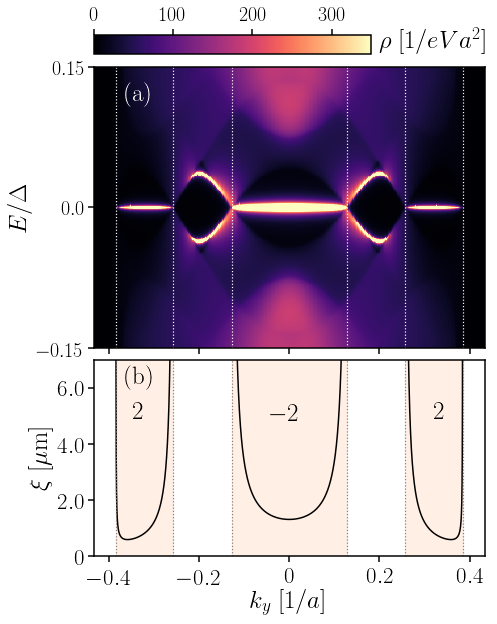

In [20]:
DOS_decay_1()

In [25]:
def DOS_decay_2():
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
    name = 'DOS_decay_2.pdf'
    # DOS data
#     out_name = 'Edge_DOS_kys_bias_mus_sqrts_no_orb_Delta08meV'
    out_name = 'Edge_DOS_kys_bias_mus_sqrts_no_orb_Delta08meV_smaller_cell'
    with open(path + out_name + '.p', 'rb') as fp:
        DOS_d_dict = pickle.load(fp)
        DOS_kys = pickle.load(fp)
        DOS_Es = pickle.load(fp)
        DOS_sqrts_mus = pickle.load(fp)
        DOS_orb_mag = pickle.load(fp)
        DOS_params = pickle.load(fp)
        DOS_three_d = pickle.load(fp)

    # Decay length data
    out_name = 'decay_length/decay_length_armchair_kpars_sqrt1,5meV_mu18337'
    with open(path + out_name + '.p', 'rb') as fp:
        dl_dat = pickle.load(fp)
        dl_kys = pickle.load(fp)
        dl_params = pickle.load(fp)
        
    fig = plt.figure()
    fig.set_size_inches(7.0, 5.5)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.5])
    
    xlim = (-0.75/np.sqrt(3), 0.75/np.sqrt(3))
    xticks = [-0.4, -0.2, 0, 0.2, 0.4]
    
    DOS_data = DOS_d_dict[DOS_sqrts_mus[1]]
    DOS_Es = DOS_Es/DOS_params['Delta']
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.08, 0.88)]
    ax1 = plt.subplot(gs[0, 0])
#     subplot_color(fig, ax1, DOS_data, DOS_kys/np.sqrt(3), DOS_Es, sharexax=True, cbar_ticks=[0, 100, 200],
#                   vmin=0, vmax=300, ylabel=r'$E/\Delta$', xticks=xticks, yticks=[-0.15, 0.0, 0.15],
#                   transpose=False, pcolor=True, normalizer=False, barlabel=None, cmap='magma', norm=1.0,
#                   labellocs=labellocs, labels=labels, cbar_loc=[0.125, 0.9, 0.55, 0.03],
#                   cbar_orientation='horizontal', cb_ticks_loc='top', cb_label_pos='top',
#                   title=r'$\rho \ [1/eVa^2]$', titleloc=[0.73, 1.07], xlim=xlim,
#                   rasterized=True, label_color='w')
    subplot_color(fig, ax1, DOS_data, DOS_kys/np.sqrt(3), DOS_Es, sharexax=True, cbar_ticks=[0, 100, 200],
                  vmin=0, vmax=300, ylabel=r'$E/\Delta$', xticks=xticks, yticks=[-0.15, 0.0, 0.15],
                  transpose=False, pcolor=True, normalizer=False, barlabel=None, cmap='magma', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.91, 0.50, 0.03, 0.38],
                  cbar_orientation='vertical',
                  title=r'$\rho \ [\frac{1}{eVa^2}]$', titleloc=[1.015, 0.03], xlim=xlim,
                  rasterized=True, label_color='w')
    
    ax2 = plt.subplot(gs[1, 0])
    ys = np.array(dl_dat)*dl_params['a']*1e-4
    
    def topo_region(y):
        return ((-0.6903/np.sqrt(3) <= y <= -0.6505/np.sqrt(3)) or
                (-0.4760/np.sqrt(3) <= y <= -0.3715/np.sqrt(3)) or
                (-0.3200/np.sqrt(3) <= y <= -0.1775/np.sqrt(3)) or
                (0.1775/np.sqrt(3) <= y <= 0.3200/np.sqrt(3)) or
                (0.3715/np.sqrt(3) <= y <= 0.4760/np.sqrt(3)) or
                (0.6505/np.sqrt(3) <= y <= 0.6903/np.sqrt(3)))
    
    ys = [y if topo_region(x) else None for x, y in zip(dl_kys/np.sqrt(3), ys)]
    
    labels = [r'$\mathrm{(b)}$', r'$2$', r'$-2$', r'$2$']
#     labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.08, 0.8), (0.11, 0.6), (0.45, 0.6), (0.86, 0.6)]
#     labellocs = [(0.08, 0.88)]
    subplot_line(ax2, dl_kys/np.sqrt(3), ys, xticks=xticks, yticks=[0, 2.0, 4.0, 6.0], ylim=[0, 7], xlim=xlim,
                 sharexax=False, title=None, textloc=[0.5, 0.5], labellocs=labellocs, labels=labels,
                 xlabel=r'$k_y \ [1/a]$', flip=False, ylabel=r'$\xi \ [\mu\mathrm{m}]$', shareyax=False)
    
    ax2.arrow(-0.34, 4.0, -0.05, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')
    ax2.arrow(-0.32, 4.0, 0.065, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')
    
    ax2.arrow(-0.02, 4.0, -0.13, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')
    ax2.arrow(0.02, 4.0, 0.13, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')
    
    ax2.arrow(0.31, 4.0, -0.065, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')
    ax2.arrow(0.33, 4.0, 0.06, -0.25, head_width=0.0, head_length=0.0, fc='k', ec='k')

    ax2.axvspan(-0.6903/np.sqrt(3), -0.6505/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(-0.4760/np.sqrt(3), -0.3715/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan( -0.3200/np.sqrt(3), -0.1775/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan( 0.1775/np.sqrt(3), 0.3200/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(0.3715/np.sqrt(3), 0.4760/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(0.6505/np.sqrt(3), 0.6903/np.sqrt(3), alpha=0.1, color=(1, 0.4, 0))
    
    # Vertical lines at phase boundaries
#     vlines = [-1.33/(2*np.sqrt(3)), -0.89/(2*np.sqrt(3)), -0.44/(2*np.sqrt(3)), 
#               0.44/(2*np.sqrt(3)), 0.89/(2*np.sqrt(3)), 1.33/(2*np.sqrt(3))]
    vlines = [-0.6903/np.sqrt(3), -0.6505/np.sqrt(3), -0.4760/np.sqrt(3),
              -0.3715/np.sqrt(3), -0.3200/np.sqrt(3), -0.1775/np.sqrt(3),
              0.1775/np.sqrt(3), 0.3200/np.sqrt(3), 0.3715/np.sqrt(3),
              0.4760/np.sqrt(3), 0.6505/np.sqrt(3), 0.6903/np.sqrt(3)]
    for vline in vlines:
        ax1.axvline(vline, ls='dotted', c='w', lw=1.2)
        ax2.axvline(vline, ls='dotted', c='grey', lw=1.2)
#     plt.tight_layout()
    ax1.set_ylim(-0.15, 0.15)
    plt.subplots_adjust(hspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


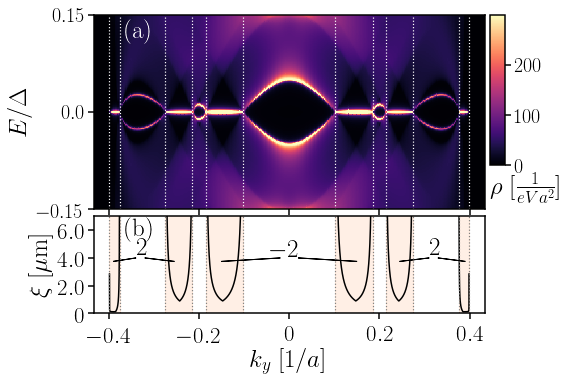

In [26]:
DOS_decay_2()

In [24]:
def DOS_decay_3orb():
    path = os.path.dirname(os.getcwd()) + r'/data/3_bnd and kp/'
    name = 'DOS_decay_3orb.pdf'
    
    fig = plt.figure()
    fig.set_size_inches(7, 9)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 0.7])
    
    # DOS data
    file = r'ldos_arm_mu1.709_Ez1.131.p'
    p, ks, ergs, Z = pickle.load(open(path+file, 'rb'))
    
    xlim = (-0.25, 0.25)
    xticks = [-0.25, 0, 0.25]
    
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.015, 0.88)]
    ax1 = plt.subplot(gs[0, 0])
    subplot_color(fig, ax1, Z, ks, ergs/p.delta, sharexax=True, cbar_ticks=[0, 5, 10, 15],
                  vmin=0, vmax=10, ylabel=r'$E/\Delta$', xticks=xticks, yticks=[-0.1, 0.0, 0.1],
                  transpose=False, pcolor=False, normalizer=False, barlabel=None, cmap='magma', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.125, 0.9, 0.55, 0.03],
                  cbar_orientation='horizontal', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'$\rho \ [1/eVa^2]$', titleloc=[0.73, 1.07], xlim=xlim,
                  rasterized=True, label_color='w')
    
    ax2 = plt.subplot(gs[1, 0])
    labels = [r'$\mathrm{(b)}$', r'$2$', r'$-2$', r'$2$']
    
    # Decay length data
    file = r'w_decay_arm_mu_1.709.p'
    p, ks, w, decay = pickle.load(open(path+file, 'rb'))

    def topo_region(y):
        return ((-0.2078 <= y <= -0.117) or
                (0.117 <= y <= 0.2078) or
                (-0.089 <= y <= 0.089))
    
    decay = np.asarray(decay)*3.19/10**4
    ys = [y if topo_region(x) else None for x, y in zip(ks, decay)]
    labellocs = [(0.015, 0.88), (0.15, 0.7), (0.48, 0.7), (0.8, 0.7)]
     
    subplot_line(ax2, ks, ys, xticks=[-0.2, -0.1, 0, 0.1, 0.2], yticks=[0, 5, 10], ylim=[0, 15], xlim=xlim,
                 sharexax=False, title=None, textloc=[0.5, 0.5], labellocs=labellocs, labels=labels,
                 xlabel=r'$k_y \ [1/a]$', flip=False, ylabel=r'$\xi \ [\mu\mathrm{m}]$', shareyax=False)
    
    ax2.axvspan(-0.2078, -0.117, alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(0.117, 0.2078, alpha=0.1, color=(1, 0.4, 0))
    ax2.axvspan(-0.089, 0.089, alpha=0.1, color=(1, 0.4, 0))
    
    # Vertical lines at phase boundaries
    vlines = [-0.2078, -0.117, -0.089, 0.089, 0.117, 0.2078]
    for vline in vlines:
        ax1.axvline(vline, ls='dotted', c='w', lw=1.2)
        ax2.axvline(vline, ls='dotted', c='grey', lw=1.2)
    
    ax1.set_ylim(-0.1, 0.1)
    plt.subplots_adjust(hspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

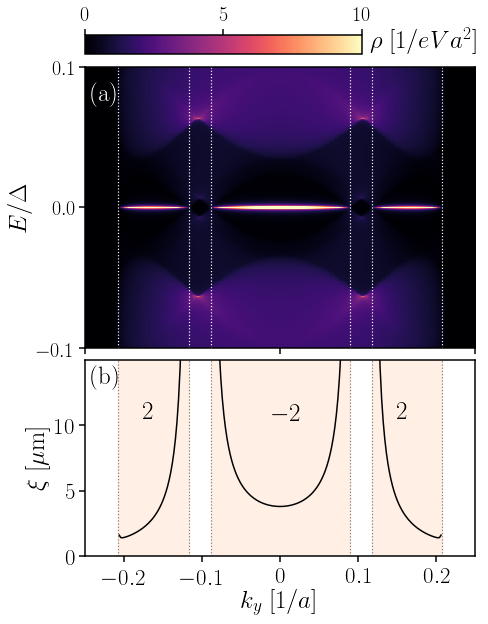

In [25]:
DOS_decay_3orb()

In [25]:
def phase_diagrams():
    # mu1 and mu2 are computed above
    path = os.path.dirname(os.getcwd()) + '/data/11_band/'
    name = 'phase_diagrams.pdf'
    # Winding number vs mu and Ex at a single ky
    out_name = 'winding_mus_sqrts_Delta08meV_adaptive_higher_res'
    with open(path + out_name + '.p', 'rb') as fp:
        data_1 = pickle.load(fp)
        mus_1 = pickle.load(fp)
        Exs_1 = pickle.load(fp)
        p_1 = pickle.load(fp)
        N = pickle.load(fp)
        eps = pickle.load(fp)
        kpar = pickle.load(fp)
        half_BZ_1 = pickle.load(fp)
        adaptive = pickle.load(fp)
        phase = pickle.load(fp)
    sqrts_1 = np.sqrt(Exs_1**2 - p_1.Delta**2)
    
    
    # vs ky and Ex at a single mu
    out_name = 'single_mu1827_winding_kys_Exs_Delta08meV_adaptive'   # mu183 and mu1827
    with open(path + out_name + '.p', 'rb') as fp:
        data_2 = pickle.load(fp)
        kys_2 = pickle.load(fp)
        Exs_2 = pickle.load(fp)
        p_2 = pickle.load(fp)
        N = pickle.load(fp)
        eps = pickle.load(fp)
        half_BZ_2 = pickle.load(fp)
        adaptive = pickle.load(fp)
        phase = pickle.load(fp)
        extended_hopping = pickle.load(fp)
    sqrts_2 = np.sqrt(Exs_2**2 - p_2.Delta**2)
    
    fig = plt.figure()
    fig.set_size_inches(7.0, 9)
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
    
    if half_BZ_1:
        scale_1 = 2
    else:
        scale_1 = 1
    xlim = (0, 20)
    ylim = (1.81, 1.87)
    xticks = [0, 10, 20]
    labels = [r'$\mathrm{(a)}$']
    labellocs = [(0.04, 0.9)]
    ax1 = plt.subplot(gs[0, 0])
    subplot_color(fig, ax1, scale_1*np.array(data_1), mus_1, 1000*sqrts_1, sharexax=True, cbar_ticks=[-2, 0, 2],
                  vmin=-2, vmax=2, ylabel=r'$\mu \ [eV]$', xticks=xticks, yticks=[1.81, 1.83, 1.85, 1.87],
                  transpose=True, pcolor=True, normalizer=False, barlabel=None, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, cbar_loc=[0.125, 0.9, 0.61, 0.03],
                  cbar_orientation='horizontal', cb_ticks_loc='top', cb_label_pos='top',
                  title=r'$W$', titleloc=[0.82, 1.07], xlim=xlim, ylim=ylim,
                  rasterized=True)
    
    # Boundaries of the topological region
    ax1.plot(1000*sqrts_1, sqrts_1 + mu1, 'g--', lw=3)
    ax1.plot(1000*sqrts_1, -sqrts_1 + mu1, 'g--', lw=3)

    ax1.plot(1000*sqrts_1, sqrts_1 + mu2, 'g--', lw=3)
    ax1.plot(1000*sqrts_1, -sqrts_1 + mu2, 'g--', lw=3)
    ax1.axhline(1.827, color='g', linestyle='dotted', lw=3)
    ax1.set_ylim(ylim);

    if half_BZ_2:
        scale_2 = 2
    else:
        scale_2 = 1
    ylim = (-0.3, 0.3) 
    labels = [r'$\mathrm{(b)}$']
    labellocs = [(0.04, 0.9)]
    ax2 = plt.subplot(gs[1, 0])
    subplot_color(fig, ax2, scale_2*np.array(data_2), kys_2/np.sqrt(3.), 1000*sqrts_2, sharexax=False,
                  cbar=False, vmin=-2, vmax=2, ylabel=r'$k_\parallel \ [\sqrt{3}a] $',
                  xticks=xticks, yticks=[-0.2, 0, 0.2], xlabel=r'$\sqrt{E_x^2-\Delta^2} \ [meV]$',
                  transpose=True, pcolor=True, normalizer=False, barlabel=None, cmap='seismic', norm=1.0,
                  labellocs=labellocs, labels=labels, title=r'', titleloc=[0.82, 1.07], xlim=xlim,
                  ylim=ylim, rasterized=True)
    ax2.axhline(0, color='g', linestyle='dotted', lw=3)
    
    ax2.axvline(8.95, color='k', linestyle='dashed', lw=1.5)
    ax2.axvline(3.85, color='k', linestyle='dashed', lw=1.5)
    ax2.axvline(15.75, color='k', linestyle='dashed', lw=1.5)
    
#     plt.tight_layout()
    plt.subplots_adjust(hspace=0.05)
    plt.savefig(name, bbox_inches='tight')
    plt.show()

In [26]:
phase_diagrams()

### Lattice sketch

In [12]:
def hex_sheet(ax, x1, x2, y1, y2):
    norbs = [1, 1]
    MX2 = kwant.lattice.general([(1, 0), (-1/2, np.sqrt(3)/2)],  # Bravais lattice vectors a1 and a2
                                [(0, 0), (1/2, 1/(2*np.sqrt(3)))], # Atom coordinates in a unit cell, M and X
                                norbs=norbs) # Number of orbitals per atom type, M and X 
    M, X = MX2.sublattices
    

    def square(site):
        x, y = site.pos
        return (x1 <= x < x2) and (y1 <= y < y2)

    # Make a builder for a 2D system with a minimal unit cell.
    bulk_sym = kwant.TranslationalSymmetry(MX2.vec((1, 0)), MX2.vec((0, 1)))   # For 2D bulk trans inv
    bulk = kwant.Builder(bulk_sym)
    
    # Onsites
    bulk[[M(0, 0)]] = 1
    bulk[[X(0, 0)]] = 1
    
    bulk[MX2.neighbors()] = 1

    syst = kwant.Builder()
    added_sites = syst.fill(bulk, square,
                            (x1, y1), max_sites=float('inf'))
    
    def family_colors(site):
        # red, green, blue, transparency
        return 'black' if site.family != M else 'yellow'

    
    kwant.plot(syst, ax=ax, site_color=family_colors, site_size=0.20, site_lw=0.05, hop_lw=0.02,
               colorbar=False);
    ax.axis('off')
    ax.set_aspect('equal')
    
    ax.arrow(0.28, -0.18, 0.0, 1.1, head_width=0.08, head_length=0.1, fc='k',
              ec='k', zorder=1)
    ax.text(0.24, 1.15, r'$y$', fontsize=25)
    ax.arrow(0.28, -0.18, 1.1, 0.0, head_width=0.08, head_length=0.1,
              fc='k', ec='k', zorder=1)
    ax.text(1.55, -0.18, r'$x$', fontsize=25)
    
    ax.arrow(1.0, 1.73, 0.8, 0.0, width=0.02, head_width=0.15, head_length=0.2,
              fc='k', ec='k', zorder=2)
    ax.text(1.35, 1.47, r'${\bf a}_1$', fontsize=25)
    ax.arrow(1.0, 1.73, 0.4, 0.693, width=0.02, head_width=0.15, head_length=0.2,
              fc='k', ec='k', zorder=2)
    ax.text(0.95, 2.2, r'${\bf a}_2$', fontsize=25)
    
    ax.text(2.18, 2.85, r'$\mathrm{M}$', fontsize=25)
    ax.text(2.18, 3.3, r'$\mathrm{X}$', fontsize=25)
    
    ax.set_xlim(0.23, 2.75)
    ax.set_ylim(-0.22, 4)

In [13]:
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(1, 1, 1)
# x1 = 0.4
# x2 = 4
# y1 = 0
# y2 = 6
# hex_sheet(ax, x1, x2, y1, y2)

### Gap closing 'phase diagram'

In [31]:
def gap_closing_diagram(ax):
    # mu1, mu2 = 1.83080333642, 1.84265848713

    # continuum, [meV]
    mu2=1000*0.0345459
    mu1=1000*0.0326863

    sqrts = np.linspace(0, 2.5, 401)
    
    # Boundaries, crossings with y axis
    mu1p = mu1 + sqrts
    mu1m = mu1 - sqrts
    mu2p = mu2 + sqrts
    mu2m = mu2 - sqrts

    ax.plot(sqrts, mu1p, 'k-', lw=2)
    ax.plot(sqrts, mu1m, 'k-', lw=2)
    ax.plot(sqrts, mu2p, 'k-', lw=2)
    ax.plot(sqrts, mu2m, 'k-', lw=2)

    # set_ticks(ax, xticks, yticks)
    ax.set_yticks([mu1, mu2]);
    labels = [r'$\mu_1$', r'$\mu_2$']
    ax.set_yticklabels(labels);
    ax.set_xticks([0]);

    ax.tick_params(width=1.5, size=6, labelsize=23);

    ax.set_xlabel(r'$\sqrt{V_x^2 - \Delta^2}$', size=25)
    ax.set_ylabel(r'$\mu$', fontsize=25)

    ax.fill_between(sqrts, mu1p, mu2p, where=(mu2p > mu1p), facecolor='green', alpha=0.6, interpolate=True)
    ax.fill_between(sqrts, mu1m, mu2m, where=(mu2m > mu1m), facecolor='green', alpha=0.6, interpolate=True)
    ax.fill_between(sqrts, mu2m, mu1p, where=(mu2m > mu1p), facecolor='yellow', interpolate=True)

    # ax.axhline(mu1, linestyle='dotted', color='black', lw=2)
    # ax.axhline(mu2, linestyle='dotted', color='black', lw=2)

    ax.text(0.15, 33.5, r'$\mathrm{I}$', fontsize=25)
    ax.text(0.4, 32.6, r'$\mathrm{III}$', fontsize=25)
    plt.scatter(0.5, 33.2, color='black', s=70)
    ax.text(0.9, 32.5, r'$\mathrm{II}$', fontsize=25)

    # ax.text(0.5, 0.5, 'text 0', props, rotation=0)
    ax.text(1.1, 36.65, r'$\mu_2 + \sqrt{V_x^2 - \Delta^2}$', fontsize=20, rotation=16)
    ax.text(1.52, 34.45, r'$\mu_1 + \sqrt{V_x^2 - \Delta^2}$', fontsize=20, rotation=17)
    ax.text(1.48, 33.05, r'$\mu_2 - \sqrt{V_x^2 - \Delta^2}$', fontsize=20, rotation=-16)
    ax.text(1.1, 30.89, r'$\mu_1 - \sqrt{V_x^2 - \Delta^2}$', fontsize=20, rotation=-18)


    # ax.text(1, 1.835, r'$\romannumeral1$', fontsize=20)
    # ax.text(1, 1.835, r'$\textup{\uppercase\expandafter{\romannumeral 1}}$', fontsize=20)

    ax.set_ylim(30, 37.5);
    ax.set_xlim(sqrts[0], sqrts[-1])

In [32]:
# nodal_circle_sketch()

### Nodal points sketch at K in different regimes

In [33]:
def coords(theta, r=1., shift=(0, 0)):
    return r*np.cos(theta) + shift[0], r*np.sin(theta) + shift[1]

def nodal_points(angles, r=1., shift=(0, 0)):
    return zip(*[coords(angle, r=r, shift=shift) for angle in angles])

def get_thetas(theta):
    # plus thetas, minus thetas
    return [theta, theta+2*np.pi/3, theta+4*np.pi/3], [-theta, -theta+2*np.pi/3, -theta+4*np.pi/3]

def nodal_circles_sketch(ax1, ax2, ax3):
    # Circle radius
    r1 = 0.4
    r2 = 0.35

    ### Subfigure 1
    # Circle 1 nodal points
    theta1 = np.pi/12 + 0.05*np.pi
    plus_thetas, minus_thetas = get_thetas(theta1)
    pxs1, pys1 = nodal_points(plus_thetas, r=r1)
    mxs1, mys1 = nodal_points(minus_thetas, r=r1)

    # Circle 2 nodal points
    theta2 = np.pi/20
    plus_thetas, minus_thetas = get_thetas(theta2)
    mxs2, mys2 = nodal_points(plus_thetas, r=r2)
    pxs2, pys2 = nodal_points(minus_thetas, r=r2)

    # Nodal points
    point_size = 150
    ax1.scatter(pxs1, pys1, marker=r'P', color='b', s=point_size, zorder=4)
    ax1.scatter(mxs1, mys1, marker=r'*', color='r', s=point_size, zorder=4)
    ax1.scatter(pxs2, pys2, marker=r'P', color='b', s=point_size, zorder=4)
    ax1.scatter(mxs2, mys2, marker=r'*', color='r', s=point_size, zorder=4)

    # Lines projecting onto k_y
    y_coords = list(mys1) + list(pys1) + list(mys2) + list(pys2)
    x_coords = list(mxs1) + list(pxs1) + list(mxs2) + list(pxs2)
    eps = 0.0
    for y, x in zip(y_coords, x_coords):
        x_L = -1.1*r1
        x_R = x
        if any(np.isclose(y, list(mys1) + list(mys2))):
            ax1.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='red', zorder=2)
        else:
            ax1.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='blue', zorder=2)

    # Boundaries of topological regions along y
    # Pairs of y-coordinates - topo between each pair.
    boundaries = list(zip(np.sort(list(mys1) + list(mys2)),
                          np.sort(list(pys1) + list(pys2))))
    delta = 0.01
    for boundary in boundaries:
        lower, upper = np.sort(boundary)
        ax1.plot([-1.1*r1, -1.1*r1], [lower+delta, upper-delta], color='g', lw=6, zorder=3)

    # Circles where SOI vanishes
    circle1 = [coords(theta, r=r1) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs1, cys1 = zip(*circle1)
    ax1.plot(cxs1, cys1, linestyle='dotted', color='grey', lw=1.5, zorder=1)
    circle2 = [coords(theta, r=r2) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs2, cys2 = zip(*circle2)
    ax1.plot(cxs2, cys2, linestyle='dotted', color='grey', lw=1.5, zorder=1)


    ### Subfigure 2
    # Circle 1 nodal points
    theta1 = np.pi/12 + 0.03*np.pi
    plus_thetas, minus_thetas = get_thetas(theta1)
    pxs1, pys1 = nodal_points(plus_thetas, r=r1)
    mxs1, mys1 = nodal_points(minus_thetas, r=r1)

    # Circle 2 nodal points
    theta2 = 0
    plus_thetas, minus_thetas = get_thetas(theta2)
    pxs2, pys2 = nodal_points(plus_thetas, r=r2)
    # mxs2, mys2 = nodal_points(minus_thetas, r=r2)

    # Nodal points
    ax2.scatter(pxs1, pys1, marker=r'P', color='b', s=point_size, zorder=4)
    ax2.scatter(mxs1, mys1, marker=r'*', color='r', s=point_size, zorder=4)
    ax2.scatter(pxs2, pys2, marker=r'D', color='m', s=point_size/2, zorder=4)

    # Lines projecting onto k_y
    y_coords = list(mys1) + list(pys1)
    x_coords = list(mxs1) + list(pxs1)
    eps = 0.0
    for y, x in zip(y_coords, x_coords):
        x_L = -1.1*r1
        x_R = x
        if any(np.isclose(y, mys1)):
            ax2.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='red', zorder=2)
        else:
            ax2.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='blue', zorder=2)

    # Boundaries of topological regions along y
    # Pairs of y-coordinates - topo between each pair.
    boundaries = list(zip(np.sort(mys1), np.sort(pys1)))
    delta = 0.01
    for boundary in boundaries:
        lower, upper = np.sort(boundary)
        ax2.plot([-1.1*r1, -1.1*r1], [lower+delta, upper-delta], color='g', lw=6, zorder=3)


    # Circles where SOI vanishes
    circle1 = [coords(theta, r=r1) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs1, cys1 = zip(*circle1)
    ax2.plot(cxs1, cys1, linestyle='dotted', color='grey', lw=1.5, zorder=1)
    circle2 = [coords(theta, r=r2) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs2, cys2 = zip(*circle2)
    ax2.plot(cxs2, cys2, linestyle='dotted', color='grey', lw=1.5, zorder=1)

    ### Subfigure 3
    # Circle 1 nodal points
    theta1 = np.pi/12 + 0.01*np.pi
    plus_thetas, minus_thetas = get_thetas(theta1)
    pxs1, pys1 = nodal_points(plus_thetas, r=r1)
    mxs1, mys1 = nodal_points(minus_thetas, r=r1)

    # Nodal points
    ax3.scatter(pxs1, pys1, marker=r'P', color='b', s=point_size, zorder=4)
    ax3.scatter(mxs1, mys1, marker=r'*', color='r', s=point_size, zorder=4)
    # Circles where SOI vanishes
    circle1 = [coords(theta, r=r1) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs1, cys1 = zip(*circle1)
    ax3.plot(cxs1, cys1, linestyle='dotted', color='grey', lw=1.5, zorder=1)

    # Lines projecting onto k_y
    y_coords = list(mys1) + list(pys1)
    x_coords = list(mxs1) + list(pxs1)
    eps = 0.0
    for y, x in zip(y_coords, x_coords):
        x_L = -1.1*r1
        x_R = x
        if any(np.isclose(y, mys1)):
            ax3.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='red', zorder=2)
        else:
            ax3.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=1.5, color='blue', zorder=2)

    # Boundaries of topological regions along y
    # Pairs of y-coordinates - topo between each pair.
    boundaries = list(zip(np.sort(mys1), np.sort(pys1)))
    delta = 0.01
    for boundary in boundaries:
        lower, upper = np.sort(boundary)
        ax3.plot([-1.1*r1, -1.1*r1], [lower+delta, upper-delta], color='g', lw=6, zorder=3)



    # k_x and k_y axes
    # k_y
    ax1.arrow(-1.1*r1, -r1*1.1, 0.0, r1*2.2, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax1.text(-1.1*r1+0.025, 1.07*r1, r'$k_y$', fontsize=25)
    ax1.plot([-1.14*r1, -1.109*r1], [0, 0], color='k', zorder=4)
    ax1.text(-1.3*r1, -0.035, r'$0$', fontsize=25, zorder=4)
    ax2.arrow(-1.1*r1, -r1*1.1, 0.0, r1*2.2, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax2.text(-1.1*r1+0.025, 1.07*r1, r'$k_y$', fontsize=25)
    ax2.plot([-1.14*r1, -1.109*r1], [0, 0], color='k', zorder=4)
    ax2.text(-1.3*r1, -0.035, r'$0$', fontsize=25, zorder=4)
    ax3.arrow(-1.1*r1, -r1*1.1, 0.0, r1*2.2, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax3.text(-1.1*r1+0.025, 1.07*r1, r'$k_y$', fontsize=25)
    ax3.plot([-1.14*r1, -1.109*r1], [0, 0], color='k', zorder=4)
    ax3.text(-1.3*r1, -0.035, r'$0$', fontsize=25, zorder=4)
    # k_x
    ax1.arrow(-1.1*r1, -1.1*r1, 2.05*r1, 0.0, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax1.text(0.95*r1, -1.05*r1, r'$k_x$', fontsize=25)
    ax2.arrow(-1.1*r1, -1.1*r1, 2.05*r1, 0.0, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax2.text(0.95*r1, -1.05*r1, r'$k_x$', fontsize=25)
    ax3.arrow(-1.1*r1, -1.1*r1, 2.05*r1, 0.0, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax3.text(0.95*r1, -1.05*r1, r'$k_x$', fontsize=25)

    # K point
    ax1.scatter(0, 0, color='k', s=point_size/4, zorder=4)
    ax1.text(-0.08, -0.04, r'$\mathrm{K}$', fontsize=25)
    ax2.scatter(0, 0, color='k', s=point_size/4, zorder=4)
    ax2.text(-0.08, -0.04, r'$\mathrm{K}$', fontsize=25)
    ax3.scatter(0, 0, color='k', s=point_size/4, zorder=4)
    ax3.text(-0.08, -0.04, r'$\mathrm{K}$', fontsize=25)

    # Figure labels
    ax1.text(0.7*r1, 0.95*r1, r'$\mathrm{I}$', fontsize=25)
    ax2.text(0.7*r1, 0.95*r1, r'$\mathrm{III}$', fontsize=25)
    ax3.text(0.7*r1, 0.95*r1, r'$\mathrm{II}$', fontsize=25)

    ylim = (-1.2*r1, 1.3*r1)
    xlim = (-1.2*r1, 1.1*r1)
    ax1.set_ylim(ylim);
    ax2.set_ylim(ylim);
    ax3.set_ylim(ylim);
    ax1.set_xlim(xlim);
    ax2.set_xlim(xlim);
    ax3.set_xlim(xlim);

    ax1.set_aspect('equal')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.axis('off');

    ax2.set_aspect('equal')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.axis('off');

    ax3.set_aspect('equal')
    ax3.set_xticks([])
    ax3.set_yticks([])
    ax3.axis('off');

In [34]:
# nodal_circles_sketch()

### Combine sketches to form Fig 1

In [35]:
def combisketch():
    fig = plt.figure()
    fig.set_size_inches(13, 13)
    gs = gridspec.GridSpec(150, 150)

    # gs = gridspec.GridSpec(3, 3)
    ax1 = plt.subplot(gs[0:100, 0:50])
    x1 = 0.4
    x2 = 4
    y1 = 0
    y2 = 6
    hex_sheet(ax1, x1, x2, y1, y2)

    ax2 = plt.subplot(gs[7:80, 70:143])
    gap_closing_diagram(ax2)

    ax3 = plt.subplot(gs[100:, 0:50])
    ax4 = plt.subplot(gs[100:, 50:100])
    ax5 = plt.subplot(gs[100:, 100:150])
    nodal_circles_sketch(ax3, ax5, ax4)

    fig.text(0.135, 0.75, r'$\mathrm{(a)}$', fontsize=35)
    fig.text(0.5, 0.8, r'$\mathrm{(b)}$', fontsize=35)
    fig.text(0.1, 0.35, r'$\mathrm{(c)}$', fontsize=35)

    plt.savefig('combisketch.pdf', bbox_inches='tight')
    plt.show()    

In [36]:
combisketch()

### Nodal points, along with Brillouin zone

In [35]:
def nodal_sketch():
    name = 'nodal_points_sketch.pdf'
    
    fig = plt.figure(figsize=(10, 10))
    ax1 = fig.add_subplot(1, 1, 1)
    
    # Angles of nodal points
    theta = np.pi/10
    plus_thetas = [theta, theta+2*np.pi/3, theta+4*np.pi/3]
    minus_thetas = [-theta, -theta+2*np.pi/3, -theta+4*np.pi/3]

    r = .3
    shift = np.array([0.6, 0])

    pxsR, pysR = nodal_points(plus_thetas, r=r, shift=shift)
    mxsR, mysR = nodal_points(minus_thetas, r=r, shift=shift)
    pxsL, pysL = nodal_points([-theta + np.pi for theta in plus_thetas], r=r, shift=-shift)
    mxsL, mysL = nodal_points([-theta + np.pi for theta in minus_thetas], r=r, shift=-shift)

    WxBZ = 2*shift[0]
    WyBZ = WxBZ * np.sqrt(3)/2
    BZ_corners = [(WxBZ/2, 0), (WxBZ/4, WyBZ/2), (-WxBZ/4, WyBZ/2),
                  (-WxBZ/2, 0), (-WxBZ/4, -WyBZ/2), (WxBZ/4, -WyBZ/2),
                 (WxBZ/2, 0)]

    # Nodal points
    point_size = 200
    ax1.scatter(pxsR, pysR, marker='P', color='b', s=point_size, zorder=4)
    ax1.scatter(mxsR, mysR, marker='*', color='r', s=point_size, zorder=4)
    ax1.scatter(pxsL, pysL, marker='P', color='b', s=point_size, zorder=4)
    ax1.scatter(mxsL, mysL, marker='*', color='r', s=point_size, zorder=4)
    corner_xs, corner_ys = zip(*BZ_corners)
    ax1.plot(corner_xs, corner_ys, color='black', lw=4)

    # Circles where SOI vanishes
    circle = [coords(theta, r=r, shift=shift) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs, cys = zip(*circle)
    plt.plot(cxs, cys, linestyle='dotted', color='grey', lw=2, zorder=1)
    circle = [coords(theta, r=r, shift=-shift) for theta in np.linspace(0, 2*np.pi, 201)]
    cxs, cys = zip(*circle)
    plt.plot(cxs, cys, linestyle='dotted', color='grey', lw=2, zorder=1)

    xbound = WxBZ/2 * 1.3 + r
    ax1.set_xlim(-xbound, xbound)
    ybound = WyBZ/2 * 1.3
    ax1.set_ylim(-ybound, ybound)

    # k_x and k_y axes
    ax1.arrow(0, -0.95*ybound, 0.0, 1.85*ybound, head_width=0.025, head_length=0.05, fc='k', ec='k', zorder=1)
    ax1.text(0.025, 0.85*ybound, r'$k_y$', fontsize=25)
    ax1.arrow(-0.95*xbound, -0.9*ybound, 1.85*xbound, 0.0, head_width=0.025, head_length=0.05,
              fc='k', ec='k', zorder=1)
    ax1.text(0.85*xbound, -0.85*ybound, r'$k_x$', fontsize=25)

    # Gamma, K, -K
    symmetry_points = [(0, 0), (WxBZ/2, 0), (-WxBZ/2, 0)]
    for point in symmetry_points:
        ax1.scatter(point[0], point[1], color='k', s=point_size/3, zorder=4)
    ax1.text(0.03, -0.085, r'$\Gamma$', fontsize=35)
    ax1.text(WxBZ/2+0.025, -0.05, r'$\mathrm{K}$', fontsize=35)
    ax1.text(-WxBZ/2-0.15, -0.05, r'-$\mathrm{K}$', fontsize=35)

    # Lines projecting onto k_y
    y_coords = list(mysL) + list(pysL)
    x_extents = list(zip(mxsL, mxsR)) + list(zip(pxsL, pxsR))
    eps = 0.055
    for y, (x_L, x_R) in zip(y_coords, x_extents):
        if any(np.isclose(y, mysL)):
            ax1.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=0.7, color='red', zorder=2)
        else:
            ax1.plot((x_L+eps, x_R-eps), (y, y), ls='dashed', lw=0.7, color='blue', zorder=2)

    # Boundaries of topological regions along y
    # Pairs of y-coordinates - topo between each pair.
    boundaries = list(zip(np.sort(mysL), np.sort(pysL)))
    delta = 0.01
    for boundary in boundaries:
        lower, upper = np.sort(boundary)
        ax1.plot([0, 0], [lower+delta, upper-delta], color='g', lw=6, zorder=3)

    ax1.set_aspect('equal')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.axis('off');

    plt.savefig(name, bbox_inches='tight')
    plt.show()

In [36]:
nodal_sketch()